<a href="https://colab.research.google.com/github/kimminju99/Cifar-10_image_classification/blob/main/minju_CAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend as K
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow.keras.optimizers as Optimizer
from sklearn.metrics import confusion_matrix
K.clear_session()

In [3]:
def get_classlabel(class_code):
    labels =  {0:'airplane', 1: 'automobile', 2: 'bird', 3 : 'cat', 4: 'deer',5:'dog', 6:'frog',7:'horse',8:'ship',9:'truck'}

    return labels[class_code]

In [4]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    #     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [5]:
def show_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, color = 'red', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, color = 'blue', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, color = 'red', label='Training Loss')
    plt.plot(epochs_range, val_loss, color = 'blue', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

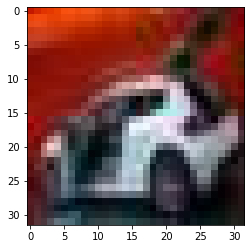

In [6]:
img_path = '/content/gdrive/My Drive/인공지능/0000.jpg'
img=mpimg.imread(img_path)
plt.imshow(img)

# 새 섹션

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
input_shape = x_train.shape[1:]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 2s 0us/step


In [8]:
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(32, 32))

In [9]:
x = image.img_to_array(img)

In [10]:
print("mean before normalization : ", np.mean(x_train))
print("std before normalization : ", np.std(x_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

print(x_train.shape)
print(x_test.shape)
print(x_train[0][0][0])

for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

for i in range(3):
    newX_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
x_train = newX_train
x_test = newX_test

print("mean after normalization : ", np.mean(x_train))
print("std after normalization : ", np.std(x_train))
print("x_train max : ", x_train.max())

batch_size = 16
num_classes = 10
epochs = 50
learningRate = 1e-4

img_rows = 32 #input image dimensions
img_cols = 32 

# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

model = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3)),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    #layers.BatchNormalization(),
    # layers.Activation('relu'),
    #layers.Dropout(0.5),
    #layer4
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes),
    layers.Activation('softmax'),
])

model.summary()

model.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

mean before normalization :  120.70756512369792
std before normalization :  64.1500758911213
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[59 62 63]
mean after normalization :  4.91799193961621e-17
std after normalization :  0.9999999999999996
x_train max :  2.126789409516928
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)   

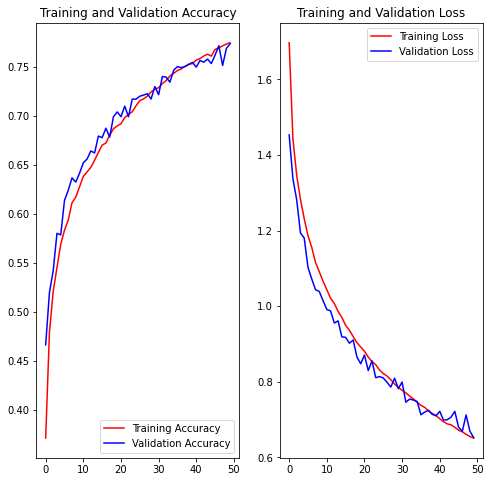

In [11]:
show_accuracy(history)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


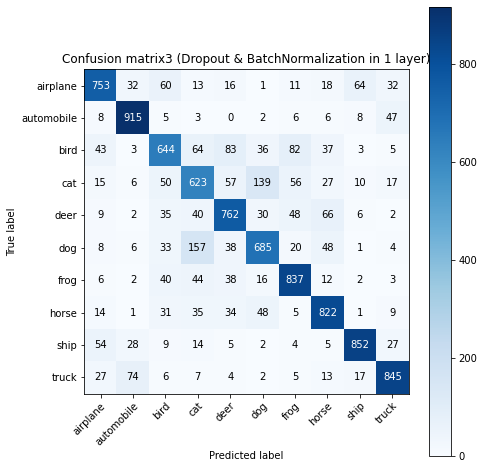

In [12]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix3 (Dropout & BatchNormalization in 1 layer)')

In [13]:
x = np.expand_dims(x, axis=0)
print(x.shape)
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)
print(x)

(1, 32, 32, 3)
[[[[-103.94  -92.78   73.32]
   [-103.94  -77.78   88.32]
   [-103.94  -65.78  100.32]
   ...
   [ -88.94  -95.78  -43.68]
   [ -86.94 -101.78  -18.68]
   [ -84.94 -104.78   -0.68]]

  [[ -95.94  -49.78  112.32]
   [ -89.94  -43.78  118.32]
   [ -90.94  -44.78  117.32]
   ...
   [ -80.94  -86.78  -30.68]
   [ -87.94 -103.78  -11.68]
   [ -96.94 -116.78   -5.68]]

  [[ -80.94  -42.78  107.32]
   [ -77.94  -39.78  110.32]
   [ -81.94  -43.78  106.32]
   ...
   [ -80.94  -84.78  -23.68]
   [ -90.94 -105.78   -6.68]
   [-100.94 -116.78    1.32]]

  ...

  [[ -71.94  -90.78  -44.68]
   [ -55.94  -75.78  -39.68]
   [ -59.94  -81.78  -61.68]
   ...
   [ -89.94 -100.78 -106.68]
   [ -85.94  -95.78  -97.68]
   [ -81.94  -93.78  -90.68]]

  [[ -73.94  -90.78  -48.68]
   [ -50.94  -68.78  -36.68]
   [ -54.94  -75.78  -59.68]
   ...
   [ -84.94  -94.78 -103.68]
   [ -79.94  -88.78  -94.68]
   [ -79.94  -89.78  -91.68]]

  [[ -72.94  -88.78  -49.68]
   [ -46.94  -63.78  -34.68]
   [ 

In [14]:
import pandas as pd
# from keras.applications.vgg16 import decode_predictions
# tf.keras.applications.resnet.decode_predictions
preds = model.predict(x)
# predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
predictions = pd.DataFrame(preds)
# print('PREDICTION:',predictions.loc[0,'category'])
predictions

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.939648,0.0,0.00365,0.0,5.757629e-14,0.0,0.056701


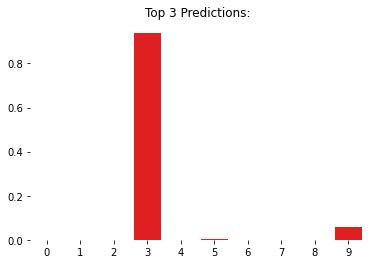

In [15]:
import seaborn as sns
f = sns.barplot(data=predictions,color="red")
sns.set_style(style='white')
f.grid(False)
f.spines["top"].set_visible(False)
f.spines["right"].set_visible(False)
f.spines["bottom"].set_visible(False)
f.spines["left"].set_visible(False)
f.set_title('Top 3 Predictions:')

argmax = np.argmax(preds[0]) #2
# if argmax == 2:
#   print("PREDICTION : birds")
output = model.output[:, argmax]

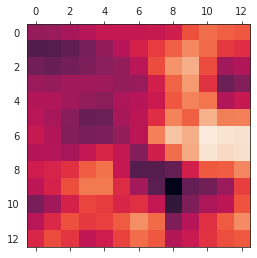

In [16]:
last_conv_layer = model.get_layer('conv2d_3')


grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer('conv2d_3').output, model.output]
)

pred_index = None

with tf.GradientTape() as tape:
  last_conv_layer_output, preds = grad_model(x)
  if pred_index is None:
    pred_index = tf.argmax(preds[0])
  class_channel = preds[:, pred_index]

grads = tape.gradient(class_channel, last_conv_layer_output)
pooled_grads = K.mean(grads, axis=(0,1,2))

#output을 input에 대해 미분??
# grads = tape.gradient(output, model.input[0])
# # grads = tf.gradient(output, last_conv_layer.output[0])
# # grads = tf.GradientTape(output, model.input[0])

last_conv_layer_output = last_conv_layer_output[0]
heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
plt.matshow(heatmap)
plt.show()

# iterate = K.function(model.input, [pooled_grads, last_conv_layer.output[0]])
# pooled_grads_value, conv_layer_output_value = iterate([x])
# for i in range(512):
#     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
# heatmap = np.mean(conv_layer_output_value, axis=-1)
# heatmap = np.maximum(heatmap, 0)
# heatmap /= np.max(heatmap)
# plt.matshow(heatmap)
# plt.show()

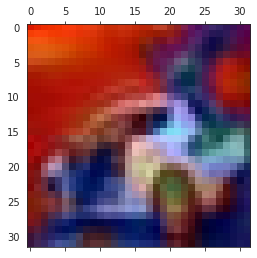

In [17]:
import matplotlib.cm as cm
img = keras.preprocessing.image.img_to_array(img)

# last_conv_layer_output = last_conv_layer_output[0]
# heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
# heatmap = tf.squeeze(heatmap)
# plt.matshow(heatmap)

heatmap = np.uint8(255*heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

plt.matshow(superimposed_img)
plt.show()